In [1]:
# importing the neccessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.metrics import make_scorer

### Dataset Information:

#### Content:

The dataset contains 9357 instances of hourly averaged responses from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device. The device was located on the field in a significantly polluted area, at road level,within an Italian city. Data were recorded from March 2004 to February 2005 (one year) representing the longest freely available recordings of on field deployed air quality chemical sensor devices responses. Ground Truth hourly averaged concentrations for CO, Non Metanic Hydrocarbons, Benzene, Total Nitrogen Oxides (NOx) and Nitrogen Dioxide (NO2) and were provided by a co-located reference certified analyzer. Evidences of cross-sensitivities as well as both concept and sensor drifts are present as described in De Vito et al., Sens. And Act. B, Vol. 129,2,2008 (citation required) eventually affecting sensors concentration estimation capabilities.

* Values are separated by `;`
* Missing values are tagged with `-200` value.
* Decimal points are represented by `,`

This dataset can be used exclusively for research purposes. Commercial purposes are fully excluded.

#### Attribute Information:

0: Date (DD/MM/YYYY)

1: Time (HH.MM.SS)

2: True hourly averaged concentration CO in mg/m^3 (reference analyzer)

3: PT08.S1 (tin oxide) hourly averaged sensor response (nominally CO targeted)

4: True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m^3 (reference analyzer)

5: True hourly averaged Benzene concentration in microg/m^3 (reference analyzer)

6: PT08.S2 (titania) hourly averaged sensor response (nominally NMHC targeted)

7: True hourly averaged NOx concentration in ppb (reference analyzer)

8: PT08.S3 (tungsten oxide) hourly averaged sensor response (nominally NOx targeted)

9: True hourly averaged NO2 concentration in microg/m^3 (reference analyzer)

10: PT08.S4 (tungsten oxide) hourly averaged sensor response (nominally NO2 targeted)

11: PT08.S5 (indium oxide) hourly averaged sensor response (nominally O3 targeted)

12: Temperature in Â°C

13: Relative Humidity (%)

14: AH Absolute Humidity

### Import Data

In [2]:
# reading the dataset
path = "Data/AirQualityUCI.csv"
df = pd.read_csv(path, sep=';')

### 1. Data Gathering

1.1 Getting to know data

In [3]:
df

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Unnamed: 15,Unnamed: 16
0,10/03/2004,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",NaN,NaN
1,10/03/2004,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",NaN,NaN
2,10/03/2004,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",NaN,NaN
3,10/03/2004,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",NaN,NaN
4,10/03/2004,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9471 entries, 0 to 9470
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           9357 non-null   object 
 1   Time           9357 non-null   object 
 2   CO(GT)         9357 non-null   object 
 3   PT08.S1(CO)    9357 non-null   float64
 4   NMHC(GT)       9357 non-null   float64
 5   C6H6(GT)       9357 non-null   object 
 6   PT08.S2(NMHC)  9357 non-null   float64
 7   NOx(GT)        9357 non-null   float64
 8   PT08.S3(NOx)   9357 non-null   float64
 9   NO2(GT)        9357 non-null   float64
 10  PT08.S4(NO2)   9357 non-null   float64
 11  PT08.S5(O3)    9357 non-null   float64
 12  T              9357 non-null   object 
 13  RH             9357 non-null   object 
 14  AH             9357 non-null   object 
 15  Unnamed: 15    0 non-null      float64
 16  Unnamed: 16    0 non-null      float64
dtypes: float64(10), object(7)
memory usage: 1.2+ MB


In [5]:
df.isnull().sum()

Date              114
Time              114
CO(GT)            114
PT08.S1(CO)       114
NMHC(GT)          114
C6H6(GT)          114
PT08.S2(NMHC)     114
NOx(GT)           114
PT08.S3(NOx)      114
NO2(GT)           114
PT08.S4(NO2)      114
PT08.S5(O3)       114
T                 114
RH                114
AH                114
Unnamed: 15      9471
Unnamed: 16      9471
dtype: int64

# drop empty columns

In [6]:
df.drop(['Unnamed: 15','Unnamed: 16' ], axis=1, inplace=True)
df.isnull().sum()

Date             114
Time             114
CO(GT)           114
PT08.S1(CO)      114
NMHC(GT)         114
C6H6(GT)         114
PT08.S2(NMHC)    114
NOx(GT)          114
PT08.S3(NOx)     114
NO2(GT)          114
PT08.S4(NO2)     114
PT08.S5(O3)      114
T                114
RH               114
AH               114
dtype: int64

In [7]:
df.tail(114)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
9357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9358,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9361,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9467,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9469,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


By observation, we identify that some rows have completely zero data to work with!!!

Let's Identify the last row index from where the value starts to get null completely

In [8]:
df.describe()

,PT08.S1(CO),NMHC(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3)
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1048.990061,-159.090093,894.595276,168.616971,794.990168,58.148873,1391.479641,975.072032
std,329.832710,139.789093,342.333252,257.433866,321.993552,126.940455,467.210125,456.938184
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,921.000000,-200.000000,711.000000,50.000000,637.000000,53.000000,1185.000000,700.000000
50%,1053.000000,-200.000000,895.000000,141.000000,794.000000,96.000000,1446.000000,942.000000
75%,1221.000000,-200.000000,1105.000000,284.000000,960.000000,133.000000,1662.000000,1255.000000
max,2040.000000,1189.000000,2214.000000,1479.000000,2683.000000,340.000000,2775.000000,2523.000000


### 2. Data Cleaning

Dropping all NaN value Columns

In [9]:
df.drop(index=[x for x in range(9357, 9471)], axis=1, inplace=True)

In [10]:
df.isnull().sum()

Date             0
Time             0
CO(GT)           0
PT08.S1(CO)      0
NMHC(GT)         0
C6H6(GT)         0
PT08.S2(NMHC)    0
NOx(GT)          0
PT08.S3(NOx)     0
NO2(GT)          0
PT08.S4(NO2)     0
PT08.S5(O3)      0
T                0
RH               0
AH               0
dtype: int64

Separating Hour from Time

In [11]:
df['Time'].dtype

dtype('O')

In [12]:
df['Hour']=df['Time'].apply(lambda x: x.split('.')[0])
df.Hour.head()

0    18
1    19
2    20
3    21
4    22
Name: Hour, dtype: object

Setting Date as Index

In [13]:
df['Date']=pd.to_datetime(df.Date, format='%d/%m/%Y')
df.set_index('Date',inplace=True)

In [14]:
df.head()

,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour
Date,,,,,,,,,,,,,,,
2004-03-10,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",18
2004-03-10,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",19
2004-03-10,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",20
2004-03-10,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",21
2004-03-10,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",22


Extracting Month from Date

In [15]:
df['Month']=df.index.month
df.reset_index(inplace=True)

In [16]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2004-03-10,18.00.00,"2,6",1360.0,150.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",18,3
1,2004-03-10,19.00.00,2,1292.0,112.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",19,3
2,2004-03-10,20.00.00,"2,2",1402.0,88.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",20,3
3,2004-03-10,21.00.00,"2,2",1376.0,80.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",21,3
4,2004-03-10,22.00.00,"1,6",1272.0,51.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",22,3


Dropping the NMHC(GT) column since 90% of that are Null values

Also dropping Unneccessary Columns

In [17]:
df.drop(columns=['NMHC(GT)'],axis=1,inplace=True)

In [18]:
df.head()

,Date,Time,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,Hour,Month
0,2004-03-10,18.00.00,"2,6",1360.0,"11,9",1046.0,166.0,1056.0,113.0,1692.0,1268.0,"13,6","48,9","0,7578",18,3
1,2004-03-10,19.00.00,2,1292.0,"9,4",955.0,103.0,1174.0,92.0,1559.0,972.0,"13,3","47,7","0,7255",19,3
2,2004-03-10,20.00.00,"2,2",1402.0,"9,0",939.0,131.0,1140.0,114.0,1555.0,1074.0,"11,9","54,0","0,7502",20,3
3,2004-03-10,21.00.00,"2,2",1376.0,"9,2",948.0,172.0,1092.0,122.0,1584.0,1203.0,"11,0","60,0","0,7867",21,3
4,2004-03-10,22.00.00,"1,6",1272.0,"6,5",836.0,131.0,1205.0,116.0,1490.0,1110.0,"11,2","59,6","0,7888",22,3


Filling NaN values with monthly average of particular hour

In [20]:
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Month','Hour'])['CO(GT)'].transform('mean'))
df['NOx(GT)']=df['NOx(GT)'].fillna(df.groupby(['Month','Hour'])['NOx(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['Month','Hour'])['NO2(GT)'].transform('mean'))

TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),31
PT08.S1(CO),366
C6H6(GT),366
PT08.S2(NMHC),366
NOx(GT),274
PT08.S3(NOx),366
NO2(GT),274
PT08.S4(NO2),366


Filling Remaining NaN values with Hourly Mean

In [ ]:
df['CO(GT)']=df['CO(GT)'].fillna(df.groupby(['Hour'])['CO(GT)'].transform('mean'))
df['NOx(GT)']=df['NOx(GT)'].fillna(df.groupby(['Hour'])['NOx(GT)'].transform('mean'))
df['NO2(GT)']=df['NO2(GT)'].fillna(df.groupby(['Hour'])['NO2(GT)'].transform('mean'))

Dropping the columns with no Label (RH)

In [ ]:
df.dropna(subset=['RH'], axis=0, inplace=True)

In [ ]:
df.isnull().sum()

,0
Date,0
Time,0
CO(GT),0
PT08.S1(CO),0
C6H6(GT),0
PT08.S2(NMHC),0
NOx(GT),0
PT08.S3(NOx),0
NO2(GT),0
PT08.S4(NO2),0


### 3. Visualizing Data Relations

3.1 Understand Co-Relation between Attributes

In [21]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.drop(columns=['Date', 'Time']).corr(), annot=True, cmap='viridis_r')
plt.title('Heatmap of Correlation between Variables', fontsize=12)
plt.show()

ValueError: could not convert string to float: '2,6'

<Figure size 1200x800 with 0 Axes>

3.2 Plot every feature against RH

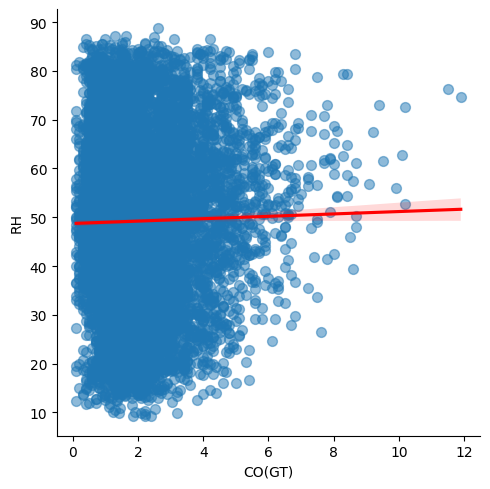

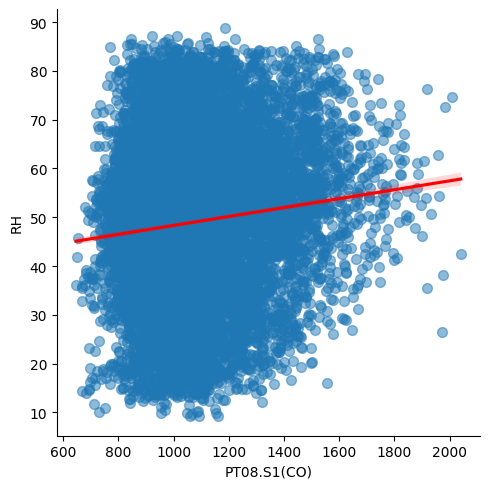

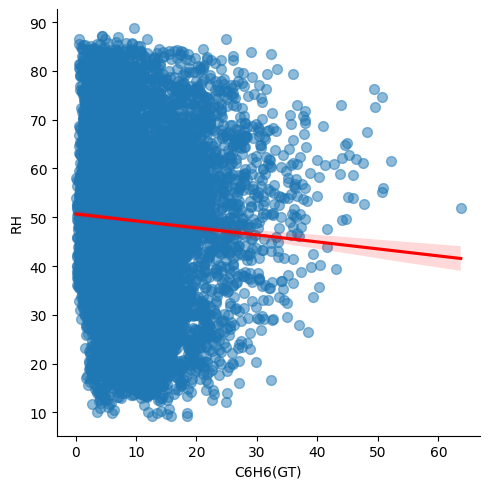

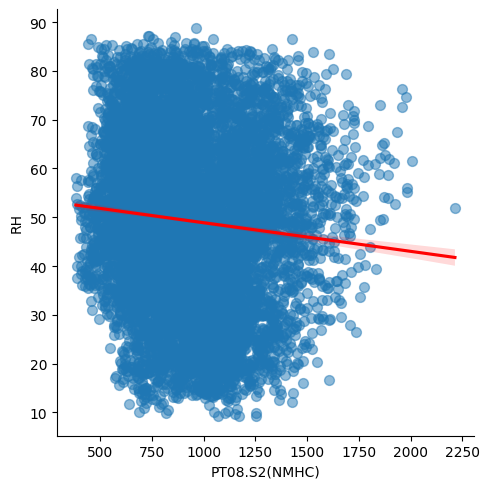

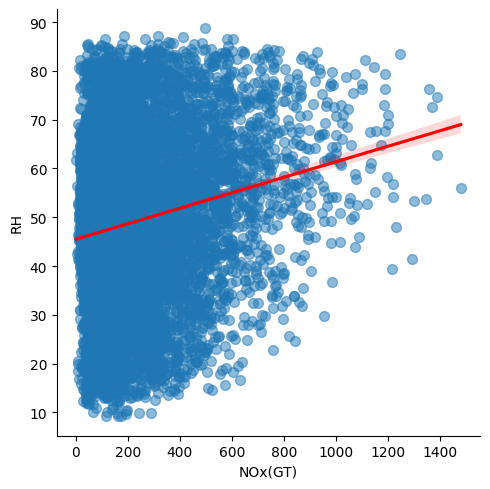

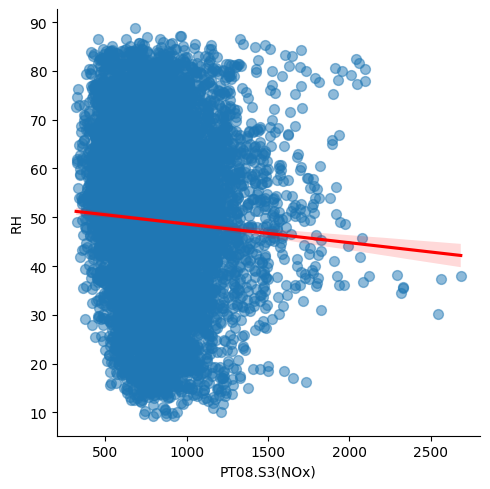

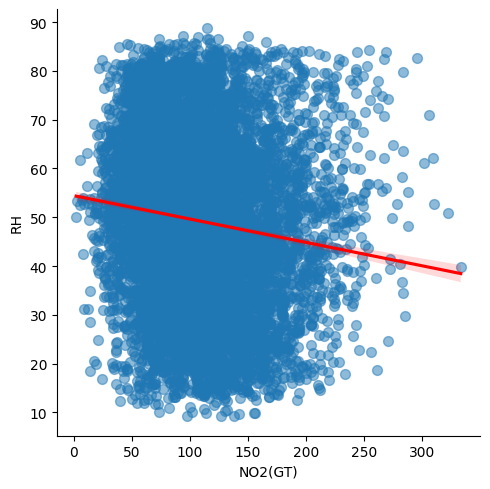

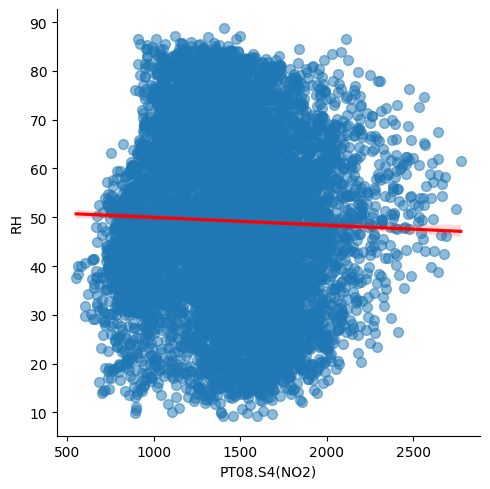

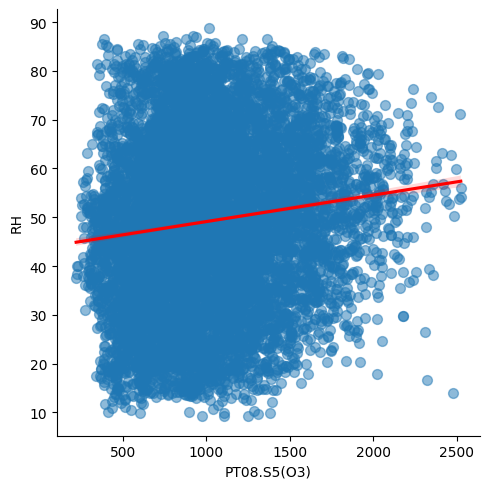

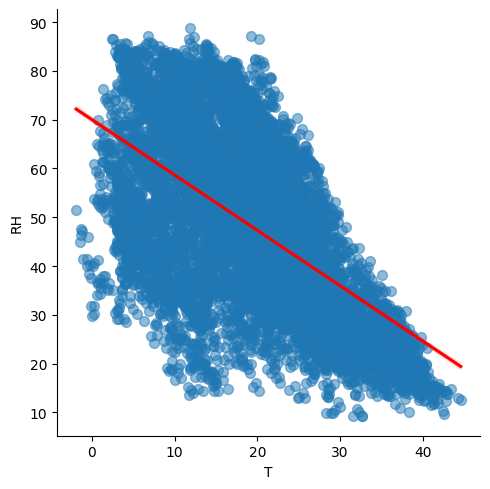

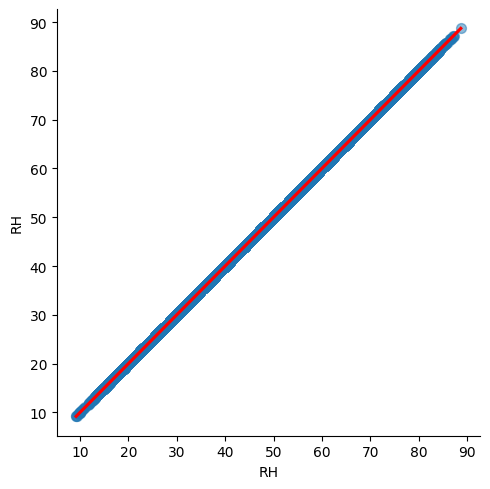

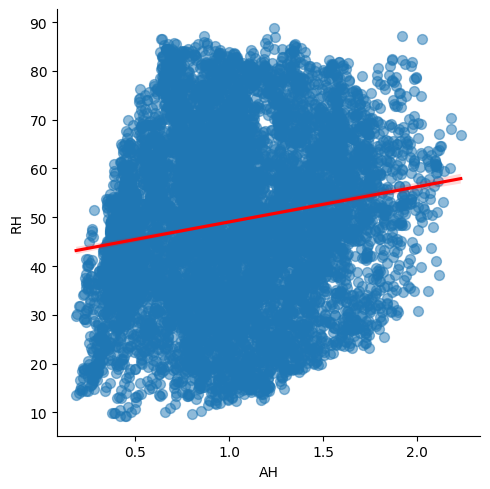

In [ ]:
columns = df.columns.tolist()[2:-2]

for col in columns:
    sns.lmplot(x=col, y='RH', data=df, height=5, aspect=1,
           scatter_kws={'s': 50, 'alpha': 0.5}, line_kws={'color': 'red'})

### 4. Data Preprocessing

4.1 Define Features (X) and Labels (y)

In [ ]:
X = df.drop(columns=['Date','Time','RH'], axis=1)
y = df['RH']

4.2 Standardize Feature Data

In [ ]:
scaler = StandardScaler()

In [ ]:
X_std = scaler.fit_transform(X)

In [ ]:
X_std_df = pd.DataFrame(X_std, columns=X.columns)
X_std_df.head()

,CO(GT),PT08.S1(CO),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,AH,Hour,Month
0,0.369711,1.198550,0.243898,0.400450,-0.355046,0.858660,0.104314,0.680947,0.615100,-0.534197,-0.663043,0.943219,-0.976555
1,-0.065552,0.885284,-0.091699,0.059391,-0.674457,1.318156,-0.357285,0.296762,-0.127757,-0.568166,-0.743035,1.087875,-0.976555
2,0.079536,1.392038,-0.145395,-0.000575,-0.532497,1.185759,0.126295,0.285208,0.128228,-0.726687,-0.681865,1.232531,-0.976555
3,0.079536,1.272260,-0.118547,0.033156,-0.324626,0.998845,0.302142,0.368977,0.451972,-0.828594,-0.591471,1.377188,-0.976555
4,-0.355727,0.793147,-0.480992,-0.386608,-0.532497,1.438871,0.170257,0.097448,0.218575,-0.805948,-0.586271,1.521844,-0.976555


4.3 Split the data into Train and Test Sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size= 0.2, random_state=42)

### 5. Modeling
##### We are considering `RandomForestRegression()` Model since Random forest is a good balance between interpretability and accuracy, while XGBoost can be difficult to interpret and more prone towards overfitting because the dataset is not that big.

5.1 `RandomForestRegression()`

5.1.1 `RandomForestRegression()`: Training and Predicting at baseline

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

In [ ]:
# checking Basic Metrics
print(f'R2 Score: {rf_model.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, rf_preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rf_preds))}')

R2 Score: 0.9985657786383882

MAE: 0.4099911061700955

RMSE: 0.6642085695789913


In [ ]:
# checking mean RMSE & MAE using cross validation score
np.random.seed(42)
mae_scorer = make_scorer(mean_absolute_error)
mse_scorer = make_scorer(mean_squared_error)

cv_scores_mae = cross_val_score(rf_model, X, y, cv=5, scoring=mae_scorer)
cv_scores_mse = cross_val_score(rf_model, X, y, cv=5, scoring=mse_scorer)

print(f'Mean of Cross Validation MAE: {np.mean(cv_scores_mae)}')
print(f'Mean of Cross Validation RMSE: {np.sqrt(np.mean(cv_scores_mse))}')

Mean of Cross Validation MAE: 0.9589680519581691

Mean of Cross Validation RMSE: 2.032678714884408


Baseline Model Metrics:
* R2 Score: 0.9985657786383882
* MAE: 0.4099911061700955
* RMSE: 0.6642085695789913
* Mean of Cross Validation MAE: 0.9589680519581691
* Mean of Cross Validation RMSE: 2.032678714884408


5.1.2 `RandomForestRegression()`: Hyperparameter Tuning

* `RandomizedSearchCV()`

In [ ]:
np.random.seed(42)

# setting the combination grid
grid = {'n_estimators': [10, 100, 200, 500, 1000],
        'max_depth': [None, 5, 10, 20, 30],
        'min_samples_split': [2, 4, 6],
        'min_samples_leaf': [1, 2, 4]}

# retting up RandomizedSearchCV()
rs_model = RandomizedSearchCV(estimator=rf_model,
                              param_distributions=grid,
                              n_iter=10,
                              cv=5,
                              verbose=2)

# fitting the model
rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 1.0min

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 1.0min

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 1.0min

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 1.0min

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=4, n_estimators=1000; total time= 1.0min

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.1min

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.1min

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.1min

[CV] END max_depth=30, min_samples_leaf=1, min_samples_split=2, n_estimators=1000; total time= 1.2min

[

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [None, 5, 10, 20, 30],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 4, 6],
                                        'n_estimators': [10, 100, 200, 500,
                                                         1000]},
                   verbose=2)

Evaluating Tuned Model:

In [ ]:
rs_preds = rs_model.predict(X_test)
print(f'R2 Score: {rs_model.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, rs_preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, rs_preds))}')

R2 Score: 0.9987006406412786

MAE: 0.3877221789883313

RMSE: 0.6322095044355255


Getting Hyperparameters of Tuned Model

In [ ]:
parameters = rs_model.best_params_
parameters

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_depth': 30}

The `RandomizedSearchCV()` gave us slightly better scores... Let's Try `GridSearchCV()`

* `GridSearchCV()`

In [ ]:
grid = {'n_estimators': [500, 1000, 1500],
        'max_depth': [20],
        'min_samples_split': [4, 6],
        'min_samples_leaf': [4]}

gs_model = GridSearchCV(estimator=rf_model,
                        param_grid=grid,
                        cv=5,
                        verbose=2)

gs_model.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  25.5s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  25.5s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  25.4s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  24.6s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=500; total time=  25.7s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  51.5s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  51.7s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  50.5s

[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=4, n_estimators=1000; total time=  50.4s

[CV] END max_dept

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [20], 'min_samples_leaf': [4],
                         'min_samples_split': [4, 6],
                         'n_estimators': [500, 1000, 1500]},
             verbose=2)

Evaluating Tuned Model:

In [ ]:
gs_preds = gs_model.predict(X_test)

print(f'R2 Score: {gs_model.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, gs_preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, gs_preds))}')

R2 Score: 0.99827965656781

MAE: 0.4164962098921741

RMSE: 0.7274513565430792


Conclusion: The Hyperparameter Tuning using `RandomizedSearchCV()` gave better model

Let's Try feature Engineering on the same model

5.X Define tuned model

In [ ]:
tuned_model = RandomForestRegressor(n_estimators=500,
                                     max_depth=30,
                                     min_samples_split=2,
                                     min_samples_leaf=1)

5.x Feature Engineering Setup

In [ ]:
# function for feature testing
def train_test_metrics(feature, model):

    """
    Trains and evaluates a given model with specified features.

    Args:
        feature (list): A list of feature names to use for training.
        model: The machine learning model to train and evaluate.

    Returns:
        dict: A dictionary containing evaluation metrics:
            - R2 Score: R-squared score on the test set.
            - RMSE: Root mean squared error on the test set.
            - MAE: Mean absolute error on the test set.
            - Mean of Cross Validation MAE: Mean MAE across 5-fold cross-validation.
            - Mean of Cross Validation RMSE: Mean RMSE across 5-fold cross-validation.
    """

    X = df[feature]
    y = df['RH']

    np.random.seed(42)

    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2)

    model_one = model.fit(X_train, y_train)

    r2_score = model_one.score(X_test, y_test)

    y_pred = model_one.predict(X_test)

    mae_scorer = make_scorer(mean_absolute_error)
    mse_scorer = make_scorer(mean_squared_error)

    cv_scores_mae = cross_val_score(model_one, X, y, cv=5, scoring=mae_scorer)
    cv_scores_mse = cross_val_score(model_one, X, y, cv=5, scoring=mse_scorer)

    results = {
        'R2 Score': r2_score,
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAE': mean_absolute_error(y_test, y_pred),
        'Mean of Cross Validation MAE': np.mean(cv_scores_mae),
        'Mean of Cross Validation RMSE': np.sqrt(np.mean(cv_scores_mse))
    }

    return results

In [ ]:
columns.remove('RH')
columns

['CO(GT)',
 'PT08.S1(CO)',
 'C6H6(GT)',
 'PT08.S2(NMHC)',
 'NOx(GT)',
 'PT08.S3(NOx)',
 'NO2(GT)',
 'PT08.S4(NO2)',
 'PT08.S5(O3)',
 'T',
 'AH']

5.1.3 `RandomForestRegression()`: Feature Engineering and Testing

In [ ]:
print('RMSE with Features as',columns[0:2], train_test_metrics(columns[0:2], tuned_model))
print('-------------------------')

print('RMSE with Features as',columns[0:6], train_test_metrics(columns[0:6], tuned_model))
print('-------------------------')

print('RMSE with Features as',columns[0:9], train_test_metrics(columns[0:9], tuned_model))
print('-------------------------')

print('RMSE with Features as',columns[1:5], train_test_metrics(columns[2:9], tuned_model))
print('-------------------------')

print('RMSE with Features as',columns[0:11], train_test_metrics(columns[0:11], tuned_model))
print('-------------------------')

print('RMSE with Features as',columns[1:12], train_test_metrics(columns[1:12], tuned_model))
print('-------------------------')

print('RMSE with Features as',columns[0:13], train_test_metrics(columns[0:13], tuned_model))

RMSE with Features as ['CO(GT)', 'PT08.S1(CO)'] {'R2 Score': -0.07300030190329765, 'RMSE': 18.16754745488599, 'MAE': 14.466409930668318, 'Mean of Cross Validation MAE': 16.04272458477143, 'Mean of Cross Validation RMSE': 19.802164650772554}

-------------------------

RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)'] {'R2 Score': 0.402400545017748, 'RMSE': 13.558182566188343, 'MAE': 10.84993876784688, 'Mean of Cross Validation MAE': 14.085645782446273, 'Mean of Cross Validation RMSE': 17.352957993035087}

-------------------------

RMSE with Features as ['CO(GT)', 'PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)'] {'R2 Score': 0.7137527297276054, 'RMSE': 9.383547529076688, 'MAE': 7.152818818107372, 'Mean of Cross Validation MAE': 10.719874524423837, 'Mean of Cross Validation RMSE': 13.555701999034733}

-------------------------

RMSE with Features as ['PT08.S1(CO)', 'C6H6


> ***Best Model after Feature Engineering:***



* Hyperparameters:                   
        n_estimators=500,
        max_depth=30,
        min_samples_split=2,
        min_samples_leaf=1

* Extracted Features (columns[1:12]):
    
    `['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']`

* R2 Score: 0.9988800158376502
* RMSE: 0.5869516419745888
* MAE: 0.3654936075597496
* Mean of Cross Validation MAE: 0.690731297476473
* Mean of Cross Validation RMSE: 1.5305725625245608

Let's fit the Best Model

In [ ]:
def fit_best_model(feature, model):

    """
    Fits the provided model with the specified features and returns the trained model along with train-test split data.

    Args:
        feature (list): A list of feature names to use for training.
        model: The machine learning model to fit.

    Returns:
        tuple: A tuple containing the following:
            - model_one: The fitted machine learning model.
            - X_train: Training features.
            - X_test: Testing features.
            - y_train: Training labels.
            - y_test: Testing labels.
    """

    X = df[feature]
    y = df['RH']

    np.random.seed(42)

    X_std = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size = 0.2)

    model_one = model.fit(X_train, y_train)

    return model_one, X_train, X_test, y_train, y_test

In [ ]:
best_model, X_train, X_test, y_train, y_test = fit_best_model(columns[1:12], tuned_model)

Make Predictions and test:

In [ ]:
best_model_preds = best_model.predict(X_test)

Check best model Score:

In [ ]:
print(f'R2 Score: {best_model.score(X_test, y_test)}')
print(f'MAE: {mean_absolute_error(y_test, best_model_preds)}')
print(f'RMSE: {np.sqrt(mean_squared_error(y_test, best_model_preds))}')

R2 Score: 0.9988800158376502

MAE: 0.3654936075597496

RMSE: 0.5869516419745888


Input new data to predict RH:

In [ ]:
def predict_rh(input):

    """
    Predicts RH based on user-fed features.

    Args:
        input (list): A list of feature values in following order:
            ['PT08.S1(CO)', 'C6H6(GT)', 'PT08.S2(NMHC)', 'NOx(GT)', 'PT08.S3(NOx)', 'NO2(GT)', 'PT08.S4(NO2)', 'PT08.S5(O3)', 'T', 'AH']

    Returns:
        Predicted RH value.
    """

    # Standardize the input data using the same scaler used for training
    input_std = scaler.transform(input)

    # Predict RH using the best model
    input_data = np.array(input_std)
    prediction = best_model.predict(input_data.reshape(1, -1))

    return prediction[0]

In [ ]:
input = []
# the list takes values of the parameters: co, c6h6, nmhc, nox_gt, nox, no2_gt, no2, o3, t, ah
# please input non-standardized data, the standardization is done inside the function
# if provided standardized data, model will predict inaccurately

model_prediction = predict_rh(input)
print(f'Model Prediction for RH: {model_prediction}')

### 6. Save the Model and Scaler

In [ ]:
pickle.dump(best_model, open('model.pkl', 'wb'))
pickle.dump(best_model, open('model.sav', 'wb'))
pickle.dump(scaler, open('scaler.pkl', 'wb'))